<a href="https://colab.research.google.com/github/WilliamYkZhang/COMP551_A2/blob/master/feature_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stemmed_df = pd.read_csv("https://raw.githubusercontent.com/WilliamYkZhang/COMP551_A2/master/preprocessed_reddit_train_SnowballStemmer.csv?token=AKKZG4FIMNL4RZOBOMSF2V25WNYXW")
# lemmatized_df = pd.read_csv("https://raw.githubusercontent.com/WilliamYkZhang/COMP551_A2/master/preprocessed_reddit_train_WordNetLemmatizer.csv?token=AKKZG4HQMPHQZO4UAY6WHHK5WNY6E")

In [0]:
def word_count(sentence):
  return len(word_tokenize(sentence))

def comment_length(sentence):
  return len(sentence)

In [0]:
# Number of word
stemmed_df["Word Count"] = stemmed_df["cleaned"].apply(word_count)

# Length of comments
stemmed_df["comment_length"] = stemmed_df["cleaned"].apply(comment_length)

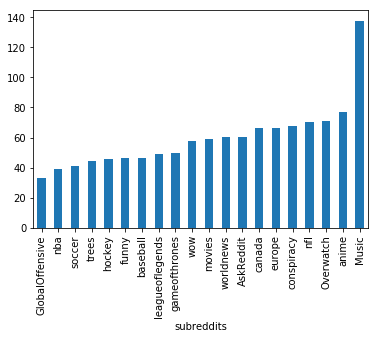

In [7]:
# Using plots to inspect correlation of the word count and the subreddit category
average_word_count = stemmed_df.groupby("subreddits")["Word Count"].mean().sort_values(ascending=True)
average_word_count.plot.bar()
plt.savefig('Average word count per subreddit.png')
files.download("Average word count per subreddit.png") 

# Plot standard deviation
std_word_count = stemmed_df.groupby("subreddits")["Word Count"].std().sort_values(ascending=True)
std_word_count.plot.bar()
plt.savefig('Standard deviation of word count per subreddit.png')
files.download("Standard deviation of word count per subreddit.png") 


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer(max_features=30000, lowercase=True, encoding="utf-8", decode_error="ignore", strip_accents='unicode',stop_words=stopwords.words('english'), analyzer = "word")

# Storing vocabulary for each subreddit into a list
vocabulary = []

# Find most frequent words for each subreddits 
for group in stemmed_df.groupby("label"):
    count_list = c_vect.fit_transform(group[1].cleaned).toarray().sum(axis=0) # sum along the rows
    word_list = c_vect.get_feature_names()
    vocabulary.append(dict(zip(word_list,count_list)))
   
 

In [0]:
# Make a list of subreddits
subreddits = []

for group in stemmed_df.groupby("label"):
  subreddits.append(group[1].subreddits.values[0])
  
print(subreddits)
  

['AskReddit', 'GlobalOffensive', 'Music', 'Overwatch', 'anime', 'baseball', 'canada', 'conspiracy', 'europe', 'funny', 'gameofthrones', 'hockey', 'leagueoflegends', 'movies', 'nba', 'nfl', 'soccer', 'trees', 'worldnews', 'wow']


In [0]:
import operator 

word_dict = dict()

# Sort each dictionary by value
for subreddit, voc in zip(subreddits, vocabulary):
# Convert each vocabulary into a list of tuples 
    voc = list(voc.items())
    sorted_dict = sorted(voc,key=operator.itemgetter(1), reverse=True)
    words, counts = zip(*sorted_dict)    
    word_dict[subreddit] = {"words":words, "counts":counts}

In [0]:
# Log 50 most frequent words in each subreddits 
for subreddit, data in word_dict.items():
  print(subreddit)
  data = list(zip(data["words"], data["counts"]))
  print(data[:50])
  

AskReddit
[('nt', 1514), ('like', 808), ('peopl', 699), ('get', 669), ('one', 619), ('would', 576), ('becaus', 515), ('time', 498), ('go', 489), ('think', 411), ('make', 400), ('work', 373), ('know', 368), ('thing', 358), ('realli', 328), ('want', 327), ('year', 323), ('use', 313), ('say', 312), ('onli', 296), ('could', 283), ('even', 282), ('got', 282), ('ani', 278), ('way', 276), ('good', 267), ('tri', 254), ('also', 252), ('see', 251), ('look', 240), ('still', 236), ('doe', 235), ('day', 234), ('much', 229), ('lot', 223), ('never', 223), ('need', 218), ('friend', 216), ('someth', 216), ('take', 216), ('well', 215), ('someon', 214), ('feel', 213), ('question', 211), ('fuck', 205), ('veri', 201), ('back', 194), ('whi', 191), ('person', 190), ('guy', 189)]
GlobalOffensive
[('nt', 1066), ('like', 600), ('play', 593), ('team', 555), ('get', 551), ('game', 472), ('would', 462), ('one', 401), ('https', 371), ('peopl', 361), ('becaus', 352), ('player', 352), ('make', 346), ('go', 345), ('th

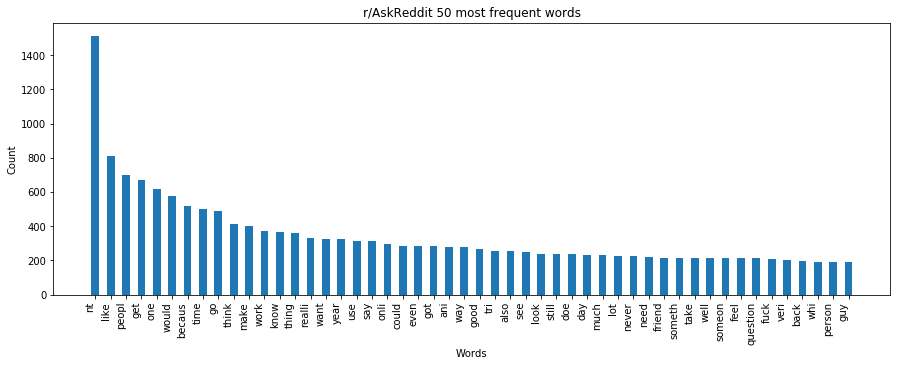

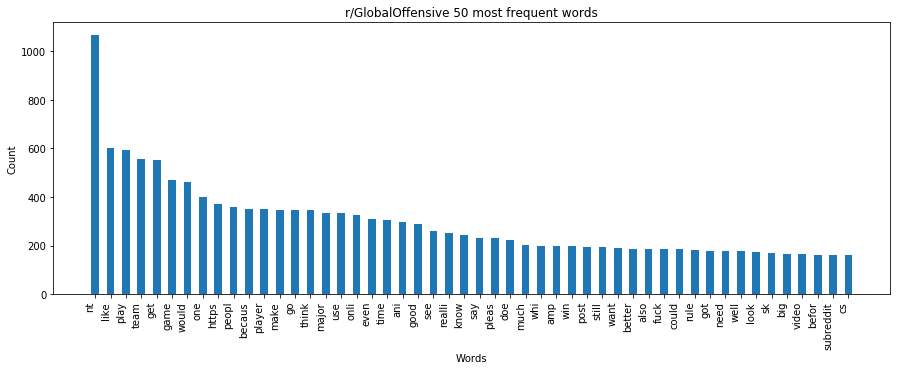

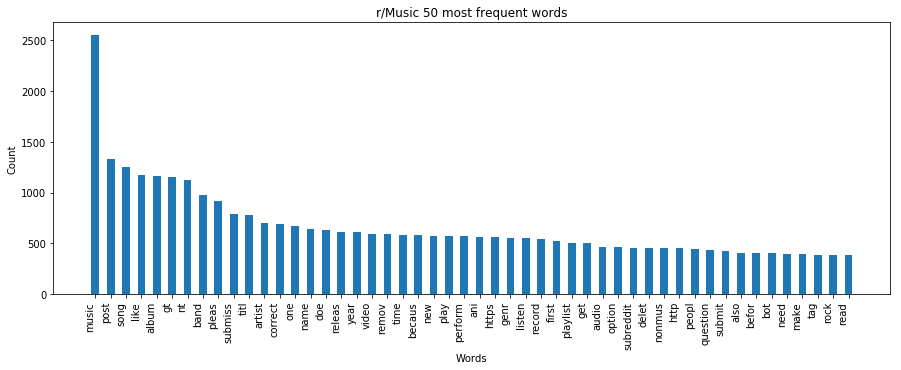

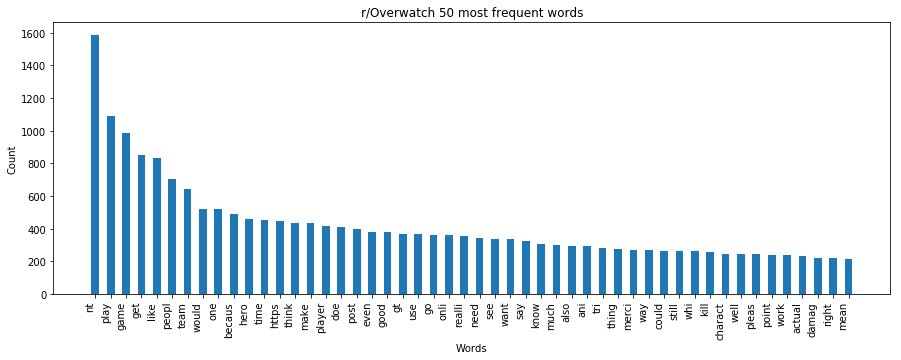

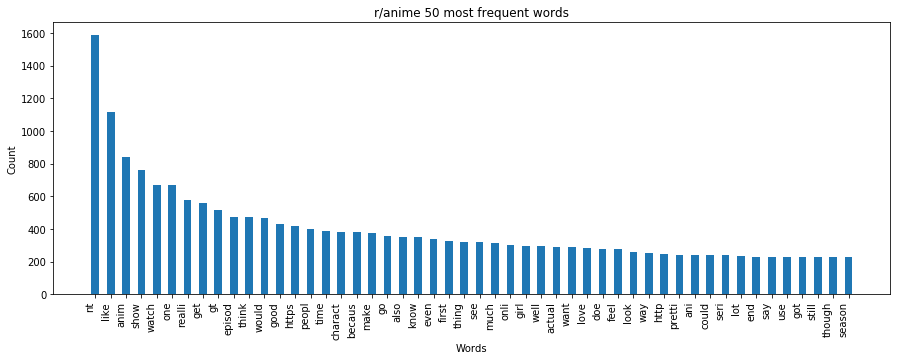

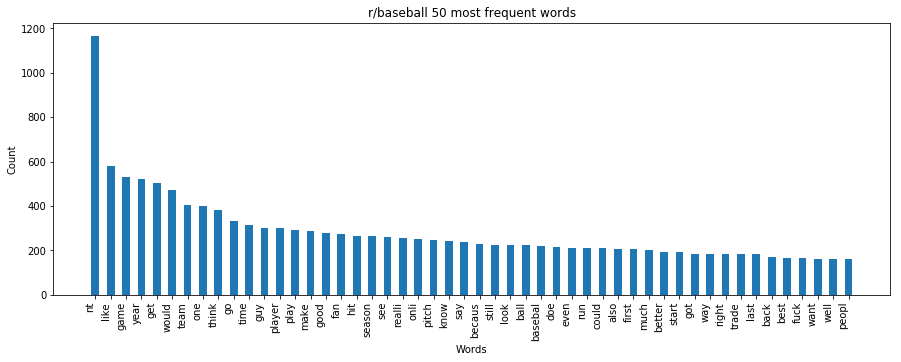

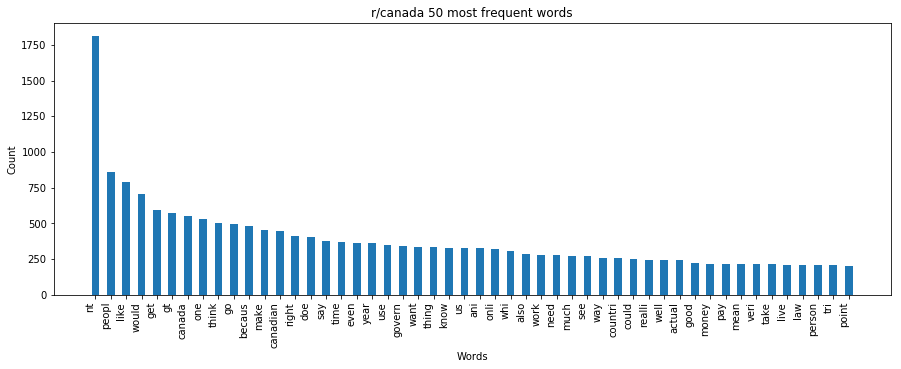

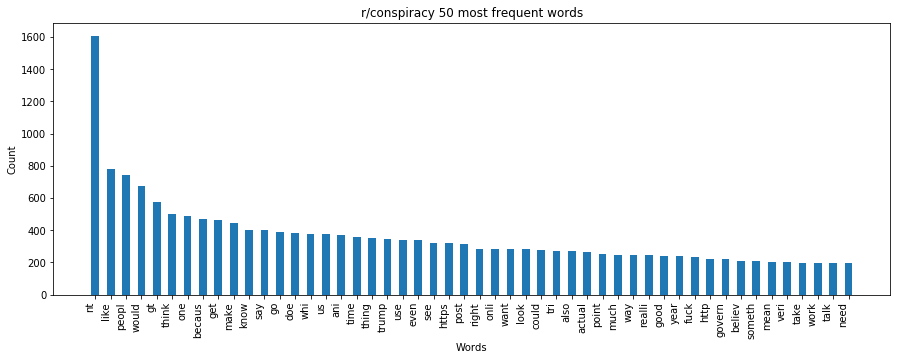

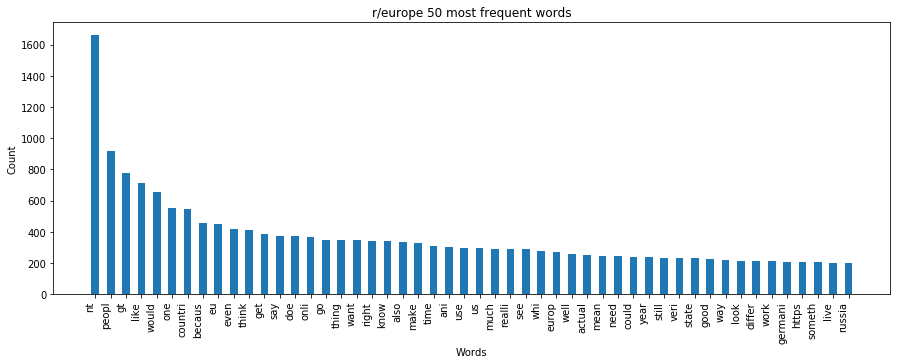

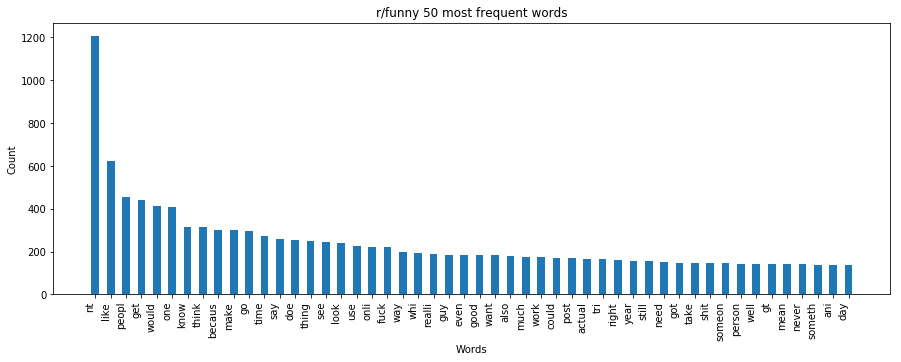

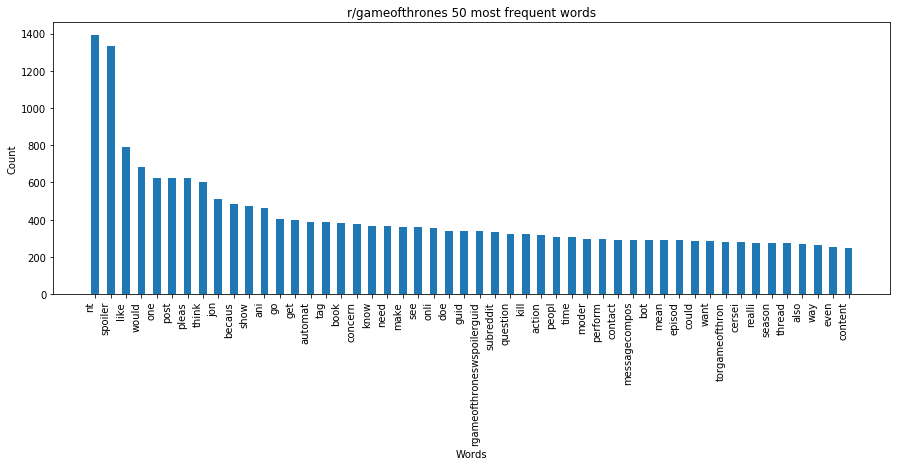

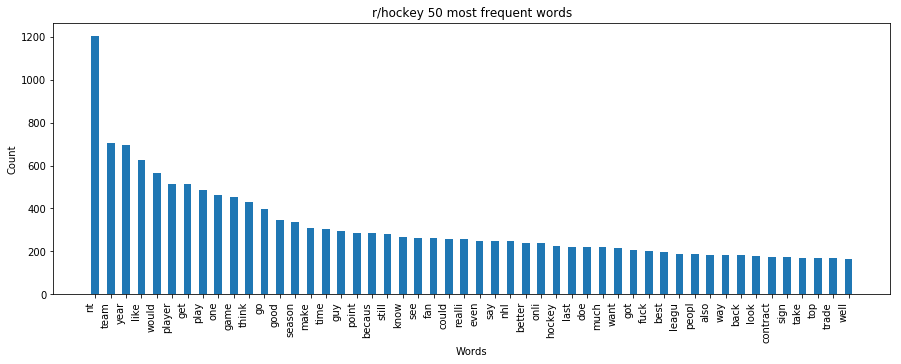

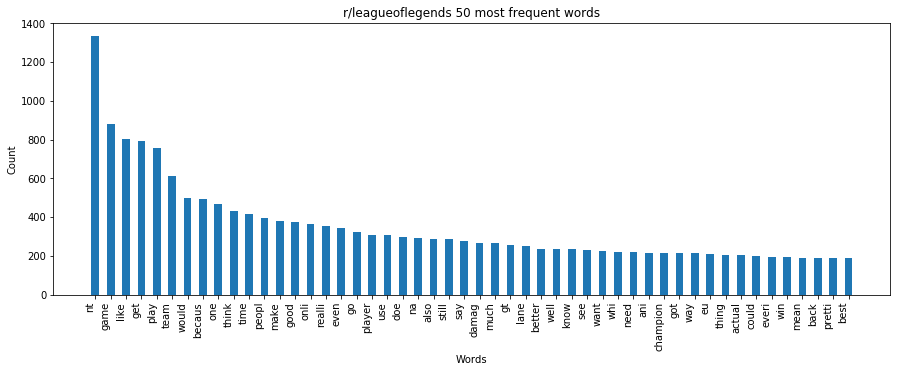

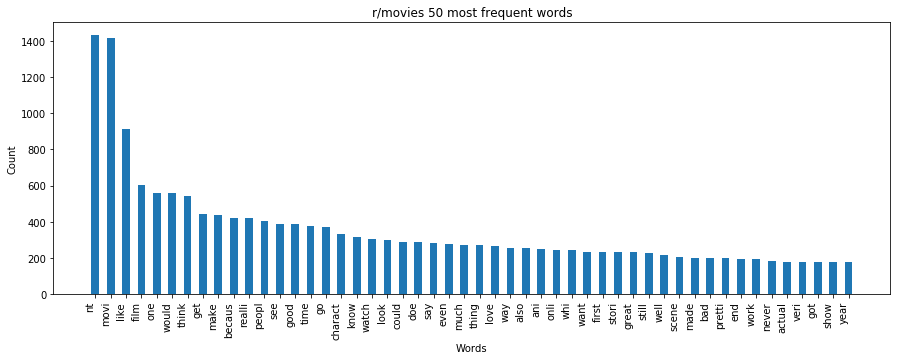

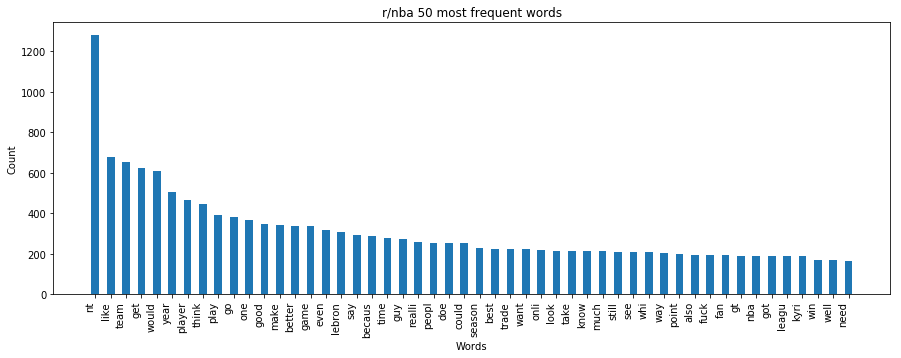

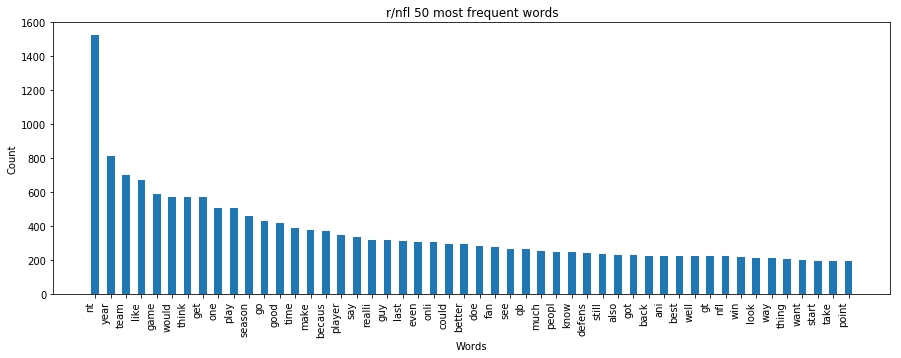

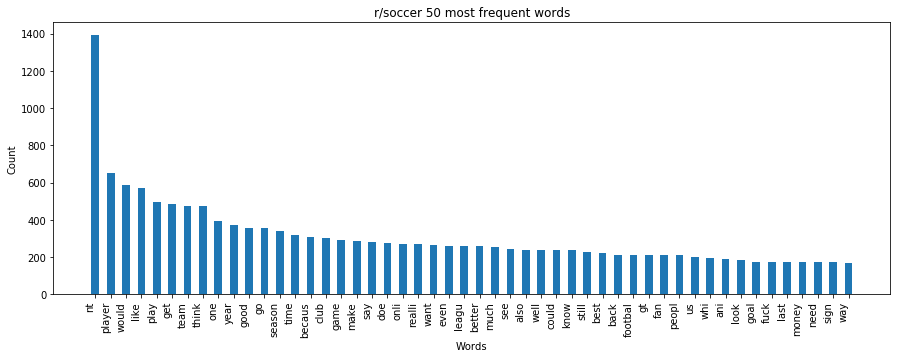

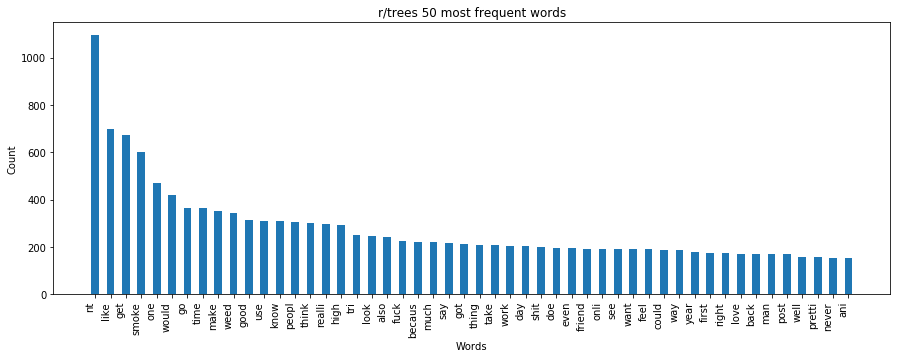

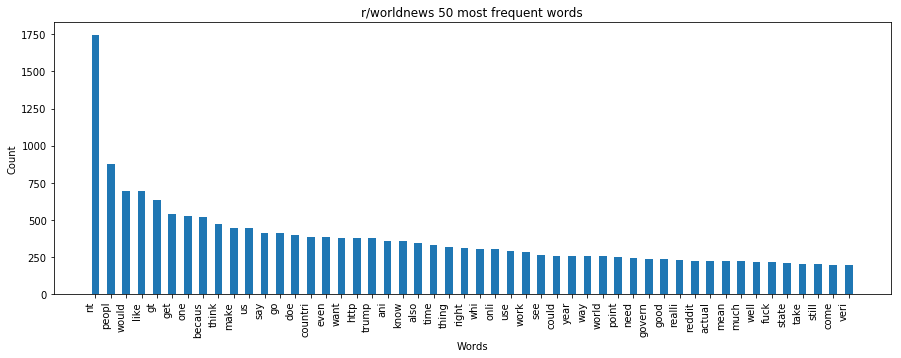

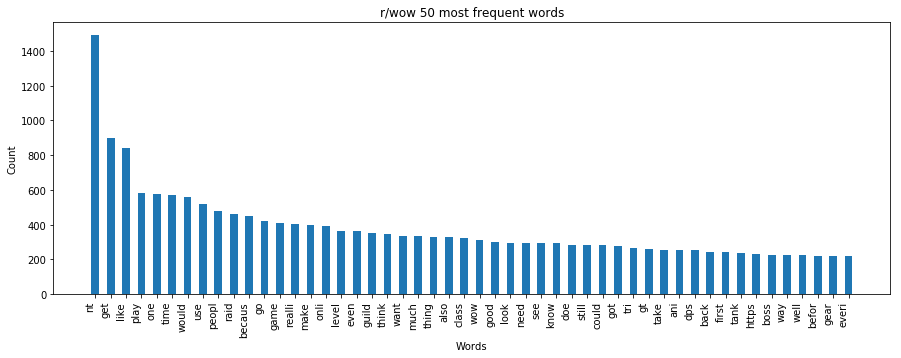

In [0]:
# Plot 50 most frequent words for each subreddits
for subreddit in subreddits:
  filename = '50_most_frequent_words_{}.png'.format(subreddit)
  data = word_dict[subreddit]
  plt.figure(figsize=(15, 5))
  plt.bar(data["words"][:50], data["counts"][:50], align='center', width=0.5)
  plt.xlabel("Words")
  plt.ylabel("Count")
  plt.xticks(rotation=90, ha='right')
  plt.title(r"r/{} 50 most frequent words".format(subreddit))
  plt.savefig(filename)
  files.download(filename)
  plt.show()
  


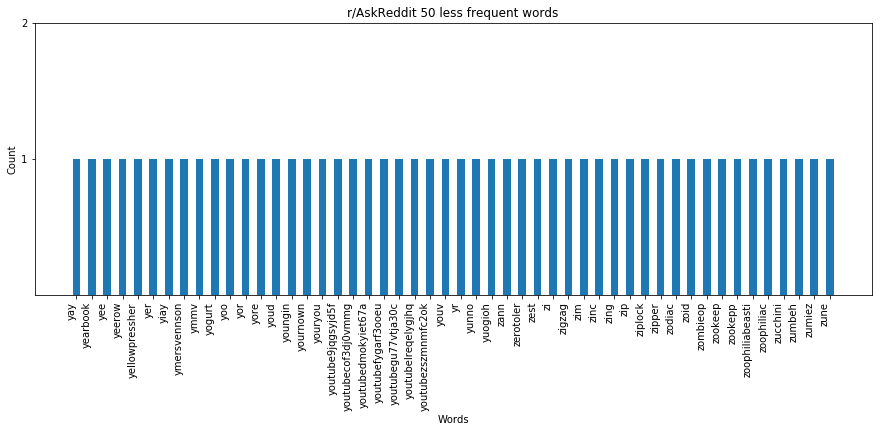

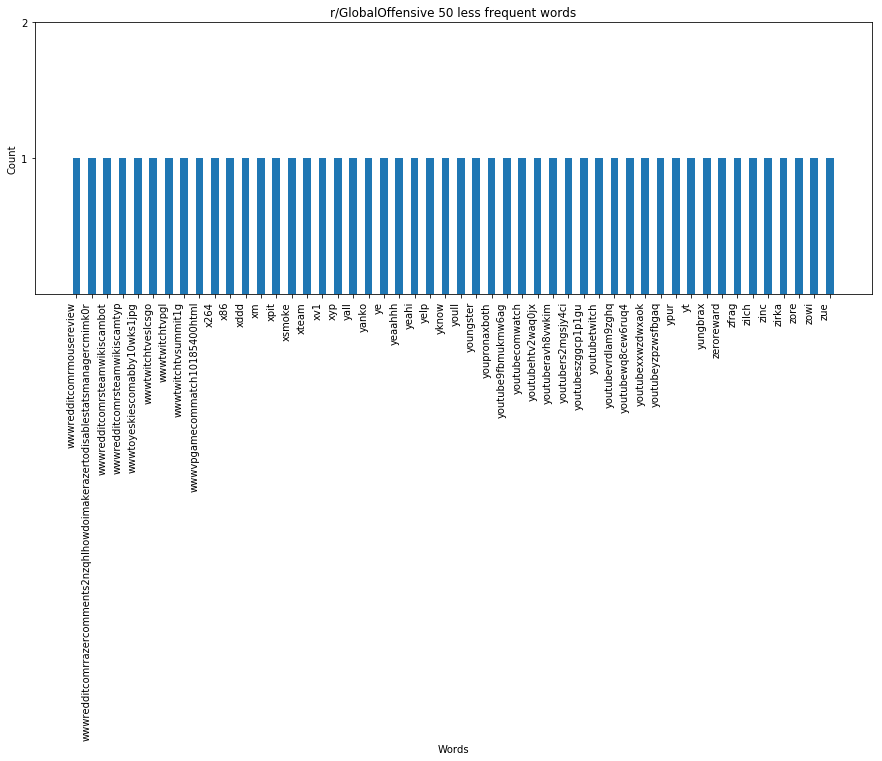

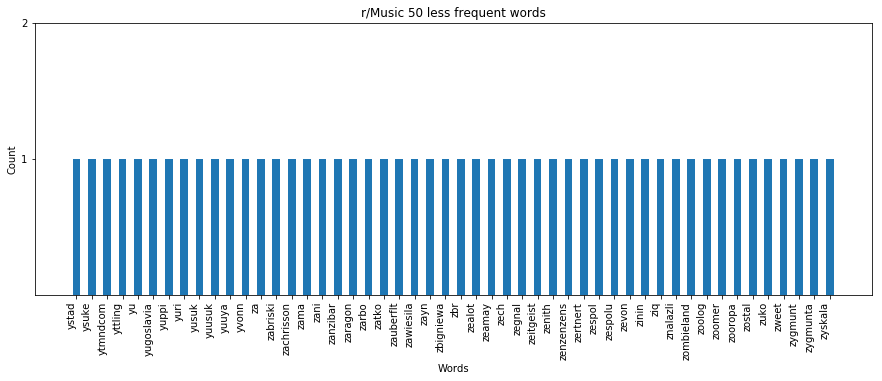

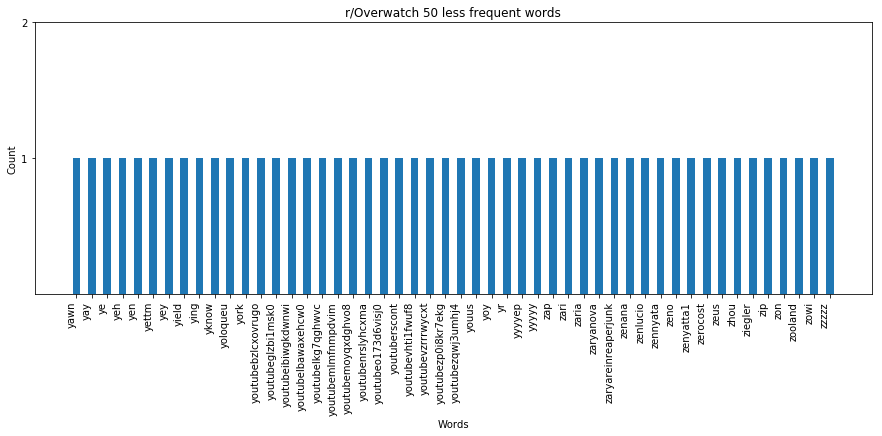

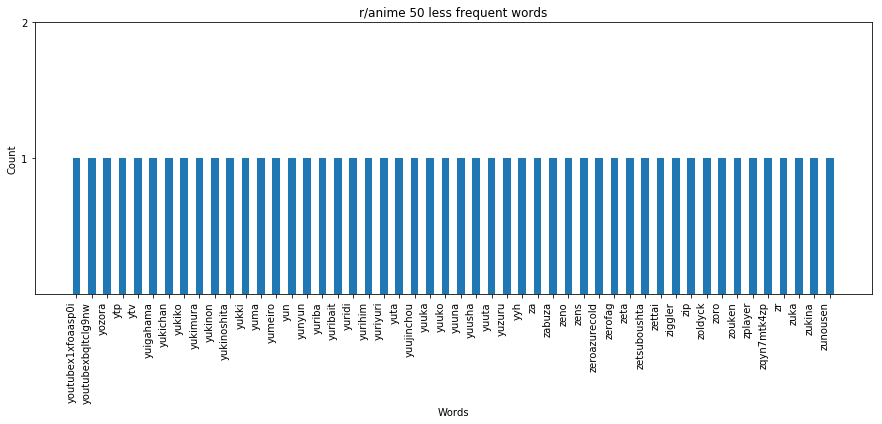

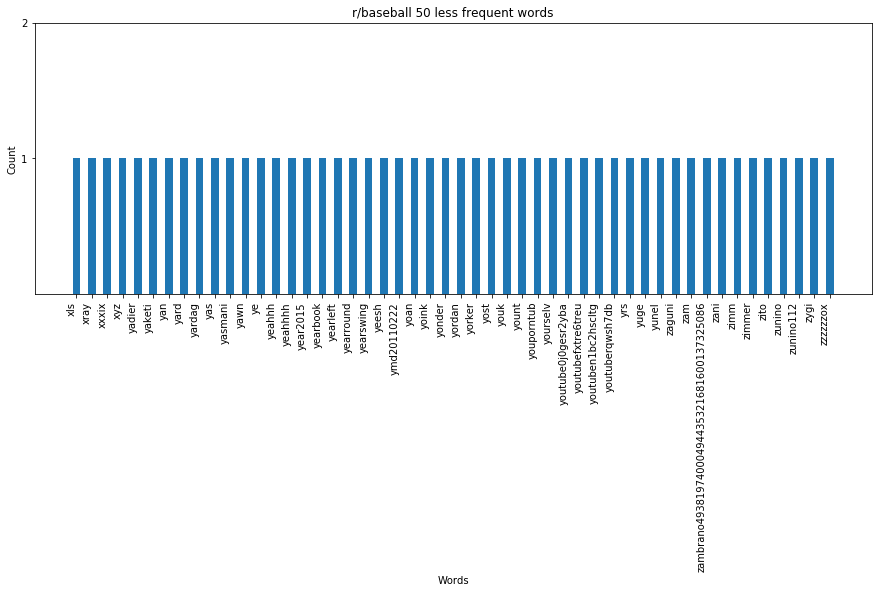

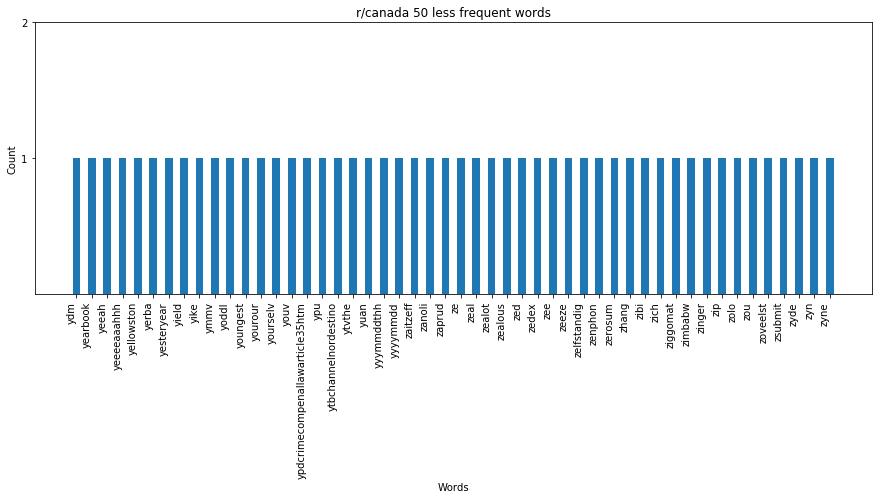

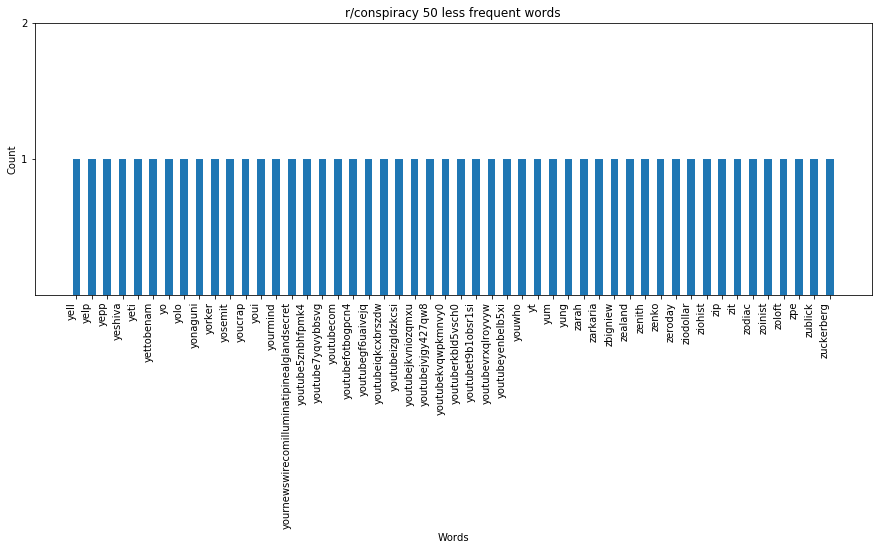

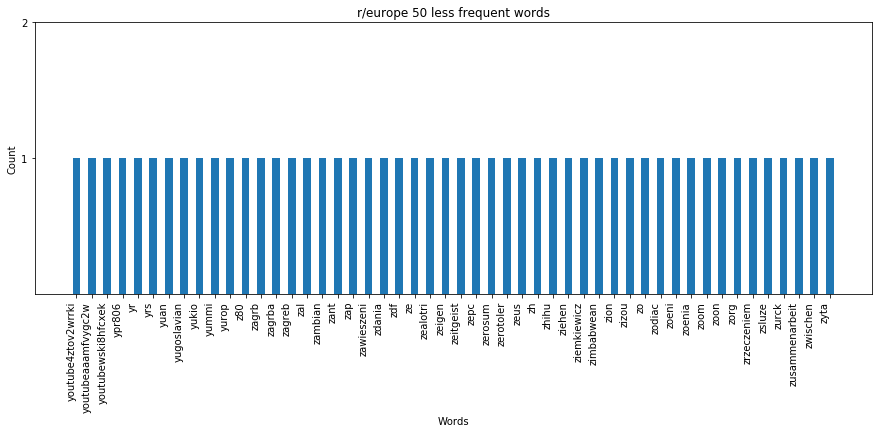

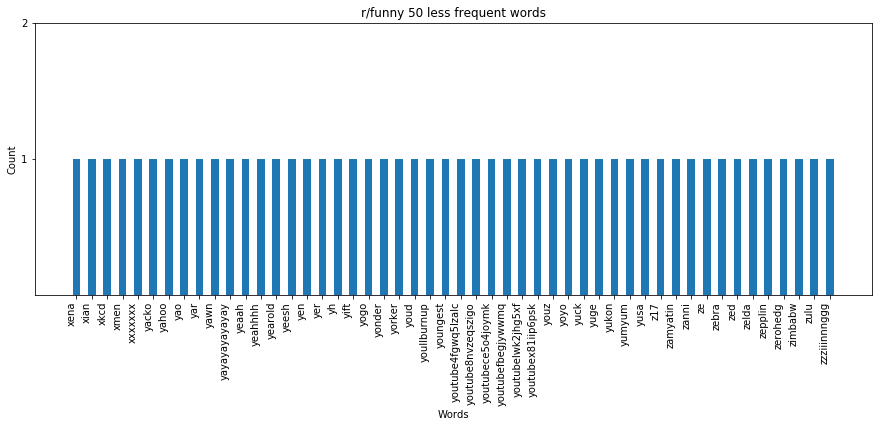

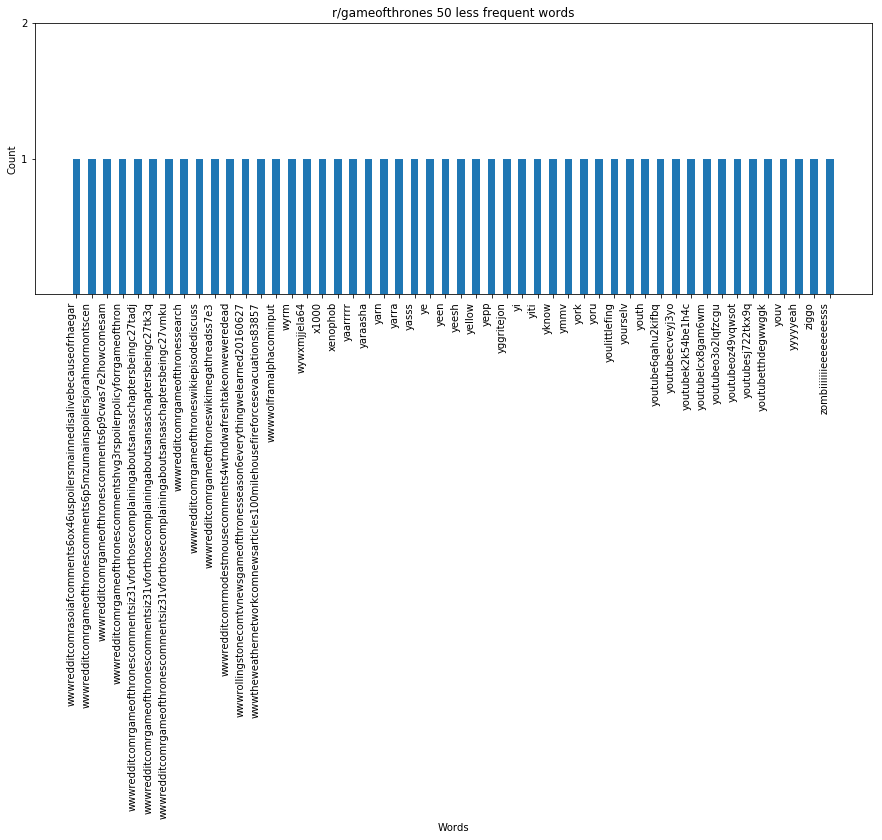

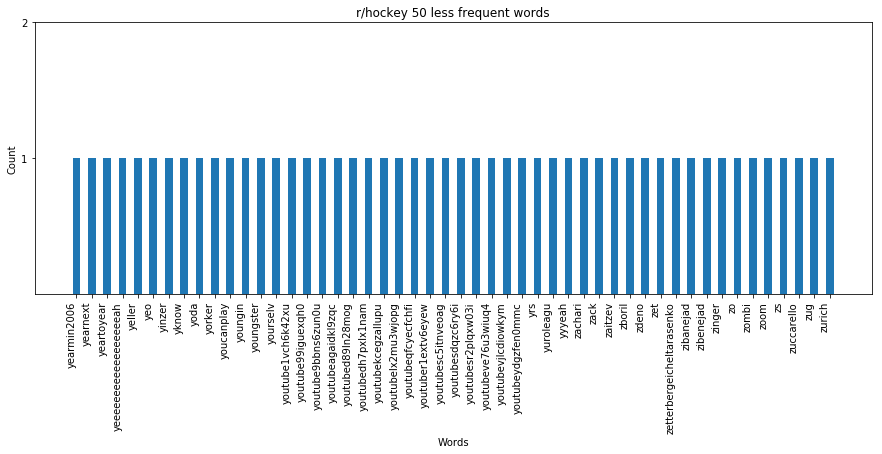

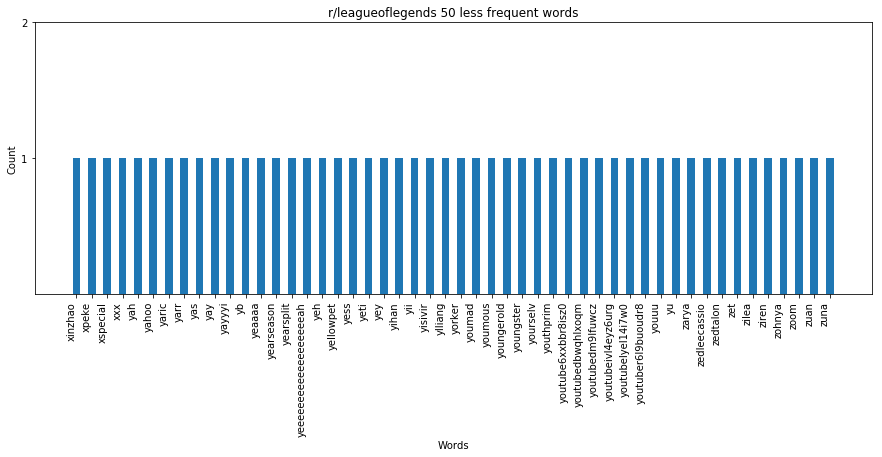

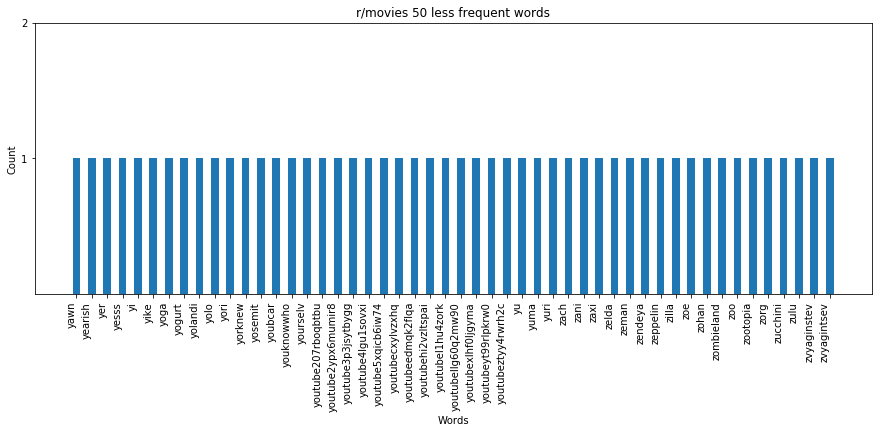

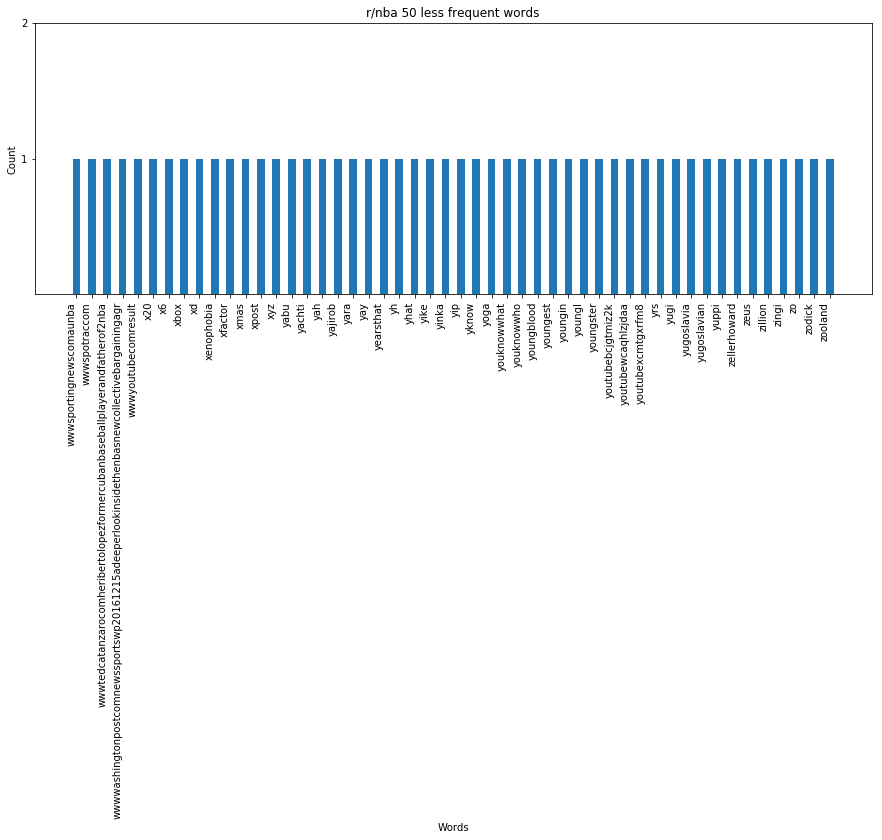

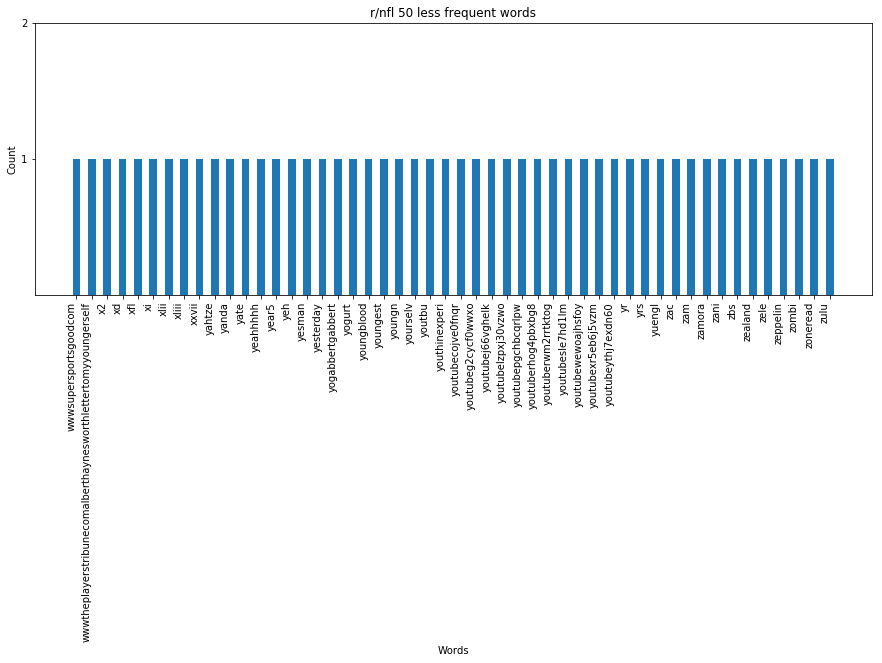

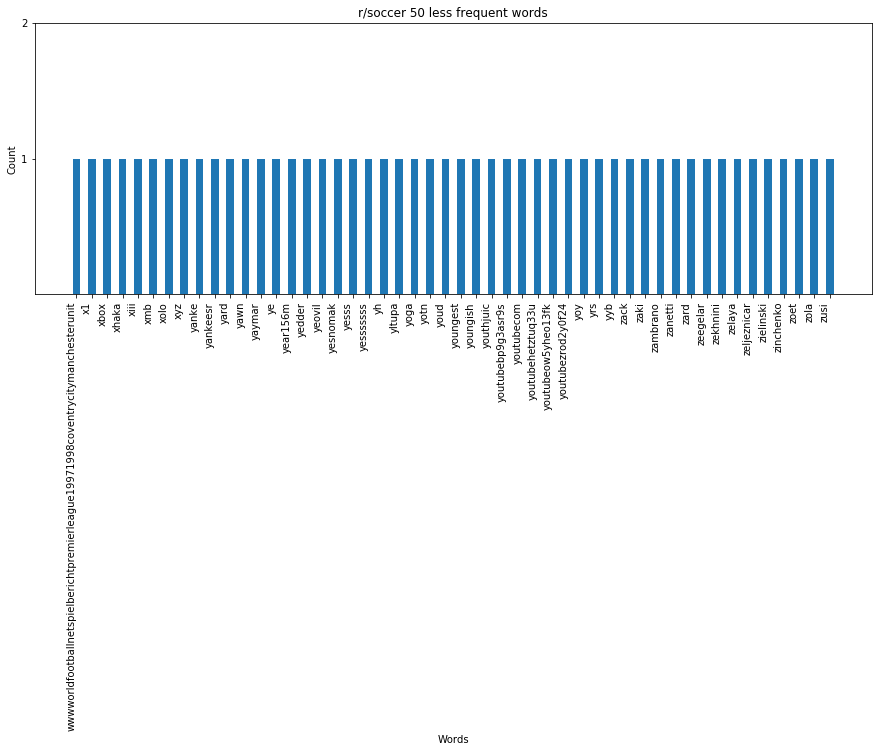

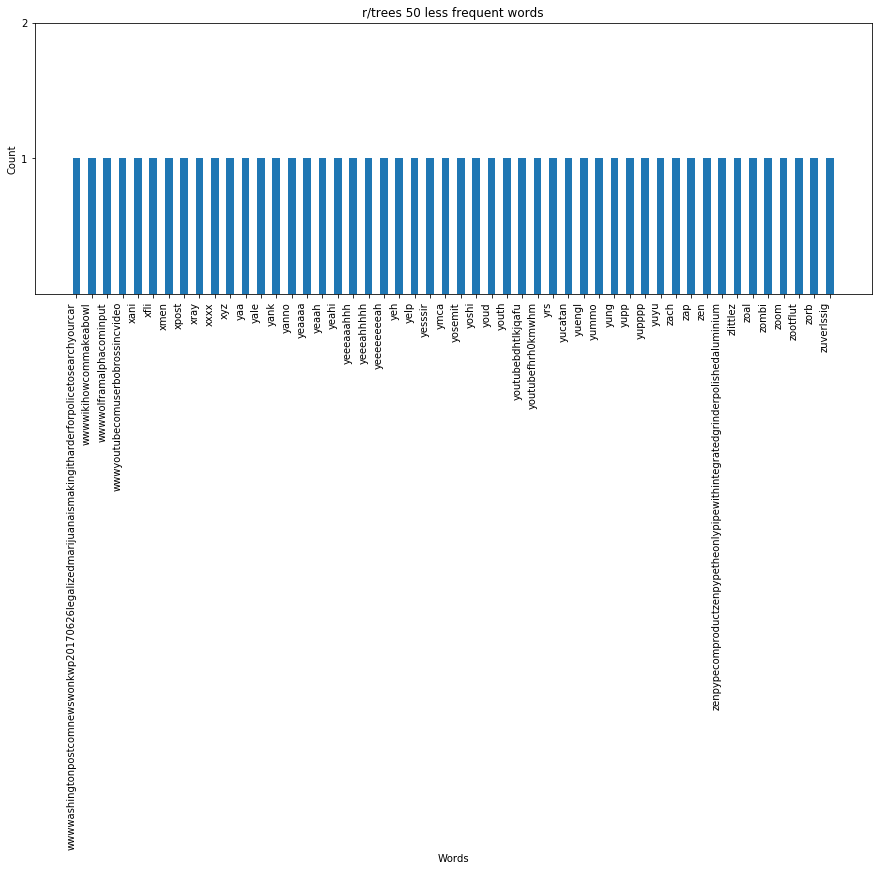

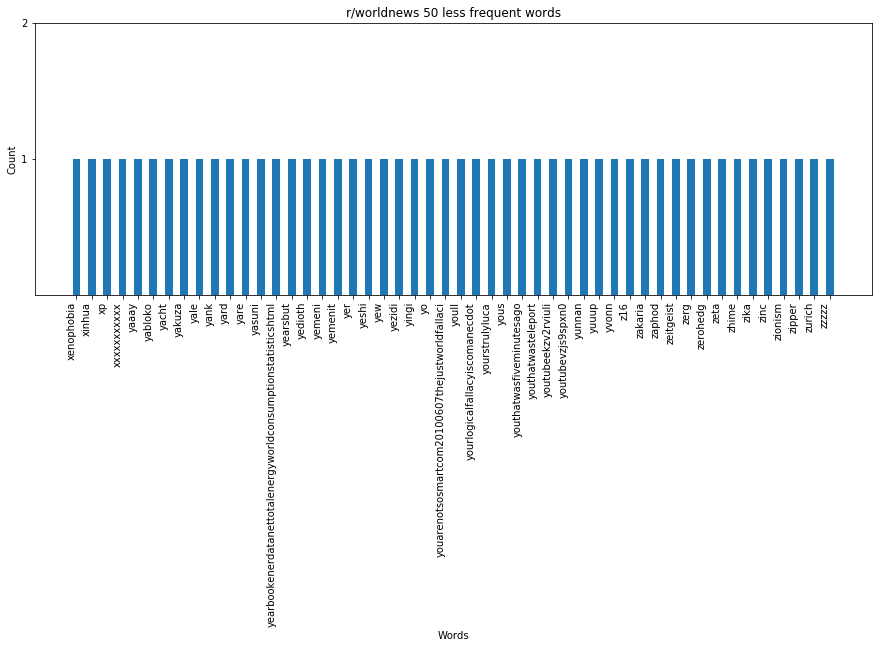

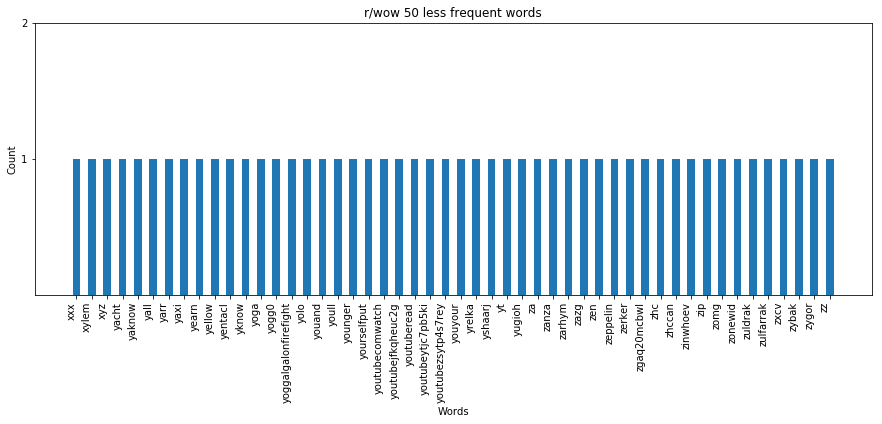

In [0]:
# Plot 50 less frequent words for each subreddits
for subreddit in subreddits:
  filename = '50_less_frequent_words_{}.png'.format(subreddit)
  data = word_dict[subreddit]
  plt.figure(figsize=(15, 5))
  plt.bar(data["words"][-50:], data["counts"][-50:], align='center', width=0.5)
  plt.xlabel("Words")
  plt.ylabel("Count")
  plt.xticks(rotation=90, ha='right')
  plt.yticks([1.0,2.0])
  plt.title(r"r/{} 50 less frequent words".format(subreddit))
  plt.savefig(filename)
  files.download(filename)
  plt.show()

In [0]:
# Create scaler 
scaler = MinMaxScaler()

# Normalize word count
stemmed_df["Word Count"] = scaler.fit_transform(stemmed_df["Word Count"].to_numpy().reshape(-1,1))

print(stemmed_df["Word Count"])


0        0.033202
1        0.015757
2        0.012380
3        0.013506
4        0.024761
5        0.005627
6        0.041643
7        0.009004
8        0.024761
9        0.023073
10       0.017445
11       0.006190
12       0.006190
13       0.005627
14       0.009004
15       0.008441
16       0.020822
17       0.012943
18       0.028700
19       0.005627
20       0.014069
21       0.163759
22       0.039392
23       0.006190
24       0.026449
25       0.034890
26       0.010129
27       0.009567
28       0.008441
29       0.006753
           ...   
69970    0.027012
69971    0.012943
69972    0.008441
69973    0.015757
69974    0.357907
69975    0.045020
69976    0.014069
69977    0.006190
69978    0.011255
69979    0.015757
69980    0.006753
69981    0.018008
69982    0.017445
69983    0.047833
69984    0.029826
69985    0.014069
69986    0.008441
69987    0.011818
69988    0.055712
69989    0.005065
69990    0.014069
69991    0.021384
69992    0.007878
69993    0.007316
69994    0